In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from sklearn.metrics import r2_score
from helper import process_log_data

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

# Process Data

In [9]:
# Response
df = process_log_data('Notification', parent_directory + '/data/notify_1000126_20230525001500.csv')

# Display DataFrame and Data Types

In [10]:
pd.set_option('display.max_columns', None)
display(df.head(3))
display(df.tail(3))
print(df.dtypes)

,timestamp,RequestId,RecordID,LogVersion,PublisherName,SiteId,BillingParameter,AdvBidRate,PubBidRate,NotificationType,AdVendor,Status,RedirectURL,UserKey,CityUsed,StateUsed,ZipUsed,LatUsed,LongUsed,locationType,OS,DeviceMake,DeviceModel,DeviceType,UserAge,Gender,Carrier,distance,Language,BidFloor,BidAmount,PartnerCampaignId,ClickId,CreativeId,CreativeSize,cost,app_inventory_id,country,cur,win3,connectiontype,ipaddress,bundleid,traffictype,reqipaddress,datacenter,displaytype,timezone
0,2023-05-25 00:13:59,jfY3raujFNhm8ujyYgDkSw,2-80000355510-390820-26161379,2.3,google,2048,80000355510@46605@0@390820@26161379,0.0019,0.0019,1,2,0,NaN,00495794-a392-7bb9-c205-a0eec9487da0,birdsboro,pa,19508,40.259998,-75.839996,3,iOS,NaN,NaN,4,U,NaN,0,10.526013,en,0.98,1.26,NaN,NaN,1964567,320x50,0.001259,NaN,us,usd,0.0,0,70.44.201.121,840919914,app,70.44.201.0,2,banner,"US/Pacific"""
1,2023-05-25 00:13:59,9029856353286531945,2-80000353840-389174-26107494,2.3,appnexus,NovelToon+-+Daily+Novels,80000353840@29882@0@389174@26107494,NaN,NaN,4,2,0,NaN,29e6b338-2678-47c1-8af4-d03009dd4066,cape coral,fl,NaN,26.5557,-82.0206,3,Apple iOS,NaN,NaN,4,U,O,NaN,4.716377,en,0.176081,0.346081,NaN,NaN,1951648,300x250,0.0,NaN,us,USD,0.0,0,68.67.161.170,1472148728,app,76.148.59.192,2,banner,"US/Pacific"""
2,2023-05-25 00:13:59,7754610940039895507,2-80000349988-391748-26162717,2.3,appnexus,mgoblog.com,80000349988@37590@0@391748@26162717,NaN,NaN,4,2,0,NaN,NaN,henrico,va,23238,37.5277,-77.4331,3,Apple Mac,NaN,NaN,2,U,O,NaN,9.811218,en,1.880263,2.010263,NaN,NaN,1970577,300x600,0.0,NaN,us,USD,0.0,0,68.67.161.203,mgoblog.com,web,173.53.125.108,2,banner,"US/Pacific"""


,timestamp,RequestId,RecordID,LogVersion,PublisherName,SiteId,BillingParameter,AdvBidRate,PubBidRate,NotificationType,AdVendor,Status,RedirectURL,UserKey,CityUsed,StateUsed,ZipUsed,LatUsed,LongUsed,locationType,OS,DeviceMake,DeviceModel,DeviceType,UserAge,Gender,Carrier,distance,Language,BidFloor,BidAmount,PartnerCampaignId,ClickId,CreativeId,CreativeSize,cost,app_inventory_id,country,cur,win3,connectiontype,ipaddress,bundleid,traffictype,reqipaddress,datacenter,displaytype,timezone
9625,2023-05-25 00:14:59,1a2c4575-06ae-4fcf-8aa7-6ef9d2bf922b,2-80000342637-392898-26165252,2.3,openx,Musi+-+Simple+Music+Streaming,80000342637@66484@0@392898@26165252,NaN,NaN,65,2,0,NaN,00000000-0000-0000-0000-000000000000,philadelphia,pa,19143,40.081039,-75.480995,3,iOS,NaN,NaN,4,U,NaN,Verizon+WiFi,0.032699,en,1.945,2.235,NaN,NaN,1977886,320x50,0.0,NaN,us,USD,0.0,2,74.109.25.147,591560124,app,74.109.25.147,2,banner,"US/Pacific"""
9626,2023-05-25 00:14:59,371f4c719a221174f1c3c4be6fb0f4e47eb5590e_43,2-80000341148-375687-25788186,2.3,rubicon,Happy+Color%C2%AE%3A+Coloring+Book,80000341148@34115@0@375687@25788186,NaN,NaN,65,2,0,NaN,6e37db28-73c9-4a76-bfe4-0cac216b62de,himeji,nagano,670-0941,34.8622,134.7033,3,Android,NaN,NaN,1,U,NaN,Other,5.052023,ja,0.94,1.1,NaN,NaN,1857431,320x50,0.0,NaN,jp,usd,0.0,2,61.197.117.38,com.pixel.art.coloring.color.number,app,61.197.117.38,2,banner,"Asia/Tokyo"""
9627,2023-05-25 00:14:59,ufa/UQc2Su0aJ4zOpznqEA,2-80000357093-392491-26164364,2.3,google,WBOY+12News,80000357093@46837@0@392491@26164364,0.0019,0.0019,1,2,0,NaN,894e1be0-4b12-dc76-4f55-320fe2ca59b5,philadelphia,pa,NaN,39.950001,-75.169998,3,android,NaN,NaN,4,U,NaN,0,3.806184,en,0.01,0.45,NaN,NaN,1975597,320x50,0.000449,NaN,us,usd,0.0,0,166.198.25.31,com.doapps.android.mln.MLN_d47268e9db2e9aa3827...,app,166.198.25.0,2,banner,"US/Pacific"""


timestamp            datetime64[ns]
RequestId                    object
RecordID                     object
LogVersion                   object
PublisherName                object
SiteId                       object
BillingParameter             object
AdvBidRate                   object
PubBidRate                   object
NotificationType             object
AdVendor                     object
Status                       object
RedirectURL                  object
UserKey                      object
CityUsed                     object
StateUsed                    object
ZipUsed                      object
LatUsed                      object
LongUsed                     object
locationType                 object
OS                           object
DeviceMake                   object
DeviceModel                  object
DeviceType                   object
UserAge                      object
Gender                       object
Carrier                      object
distance                    

# Response Data Summarization

In [11]:
missing_values_count = df.isna().sum()
total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Column': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Percentage': missing_values_percentage.values
})

display(missing_data_summary)

,Column,Missing Values,Percentage
0,timestamp,0,0.000000
1,RequestId,0,0.000000
2,RecordID,0,0.000000
3,LogVersion,0,0.000000
4,PublisherName,0,0.000000
5,SiteId,12,0.124636
6,BillingParameter,0,0.000000
7,AdvBidRate,4652,48.317408
8,PubBidRate,4652,48.317408
9,NotificationType,0,0.000000


In [16]:
df.describe(include='all', datetime_is_numeric=True)

,timestamp,RequestId,RecordID,LogVersion,PublisherName,SiteId,BillingParameter,AdvBidRate,PubBidRate,NotificationType,AdVendor,Status,RedirectURL,UserKey,CityUsed,StateUsed,ZipUsed,LatUsed,LongUsed,locationType,OS,DeviceMake,DeviceModel,DeviceType,UserAge,Gender,Carrier,distance,Language,BidFloor,BidAmount,PartnerCampaignId,ClickId,CreativeId,CreativeSize,cost,app_inventory_id,country,cur,win3,connectiontype,ipaddress,bundleid,traffictype,reqipaddress,datacenter,displaytype,timezone
count,9628,9628,9628,9628.0,9628,9616,9628,4976.0000,4976.0000,9628.0,9628.0,9628.0,74,9390,9401,9628,8705,9628.000000,9628.000000,9628.0,9628,0,0,9628.0,9628,2344,6777,9628.00,8448,9628.000000,9628.00,331,0,9628.0,9628,9628.0,0,9628,9628,9628.0,9628.0,9628,9628,9628,9628,9628.0,9628,9628
unique,NaN,4920,794,1.0,4,958,794,14.0000,14.0000,7.0,1.0,4.0,60,3525,1604,102,2348,3575.000000,3550.000000,2.0,13,0,0,4.0,6,2,86,3626.00,18,1019.000000,2321.00,39,0,1309.0,5,1406.0,0,6,2,1.0,6.0,4709,966,2,3888,NaN,1,6
top,NaN,332c4c90-5288-467c-bccc-3242320c555b,2-80000337362-371564-25707072,2.3,rubicon,Happy+Color%C2%AE%3A+Coloring+Book,80000337362@34082@0@371564@25707072,0.0019,0.0019,1.0,2.0,0.0,https://www.bhhs.com/michigan-real-estate-mi30...,00000000-0000-0000-0000-000000000000,philadelphia,fl,33040,39.950001,-75.169998,3.0,Android,NaN,NaN,4.0,U,O,Other,0.01,en,0.946666,2.01,Y3767DA,NaN,1833466.0,320x50,0.0,NaN,us,usd,0.0,0.0,14.13.160.161,com.pixel.art.coloring.color.number,app,2600:387:f::,NaN,banner,"US/Pacific"""
freq,NaN,10,194,9628.0,3220,590,194,2640.0000,2640.0000,4976.0,9628.0,9535.0,4,846,100,848,55,50.000000,45.000000,8161.0,2894,NaN,NaN,4201.0,9618,2341,3119,437.00,5993,431.000000,42.00,30,NaN,146.0,6034,4678.0,NaN,7343,5799,9628.0,5692.0,23,590,8042,45,NaN,9628,6833
mean,2023-05-25 00:14:29.000103936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
min,2023-05-25 00:13:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
25%,2023-05-25 00:14:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
50%,2023-05-25 00:14:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
75%,2023-05-25 00:14:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
max,2023-05-25 00:14:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [17]:
# Specify the columns for which you want to get the value counts
columns = ['PublisherName','SiteId','AdvBidRate','PubBidRate','NotificationType','AdVendor','Status','OS',
               'DeviceType','UserAge','Gender','distance','Language','BidFloor','BidAmount','CreativeSize',
               'cost','connectiontype','ipaddress','traffictype','reqipaddress']

# Iterate over the columns and display the value counts table for each column
for column in columns:
    value_counts_table = df[column].value_counts().to_frame()
    print(f"Value Counts for {column}:")
    display(value_counts_table)
    print()

Value Counts for PublisherName:


,PublisherName
rubicon,3220
appnexus,2775
google,2579
openx,1054



Value Counts for SiteId:


,SiteId
Happy+Color%C2%AE%3A+Coloring+Book,590
microsoftcasualgames.com,546
Alarm+Clock+for+Me+free,514
Fox+News%3A+Live+Breaking+News,323
Blis+Media+XAPI,217
...,...
notfries.com,1
motor-junkie.com,1
Paint+by+number+-+Relax,1
Block+Blast-Block+Puzzle+Games,1



Value Counts for AdvBidRate:


,AdvBidRate
0.0019,2640
0.0061,747
0.0050,330
0.0025,254
0.0024,253
0.0022,225
0.0033,133
0.0030,102
0.0036,101
0.0023,77



Value Counts for PubBidRate:


,PubBidRate
0.0019,2640
0.0061,747
0.0050,330
0.0025,254
0.0024,253
0.0022,225
0.0033,133
0.0030,102
0.0036,101
0.0023,77



Value Counts for NotificationType:


,NotificationType
1,4976
65,2499
4,1361
64,486
62,119
63,113
2,74



Value Counts for AdVendor:


,AdVendor
2,9628



Value Counts for Status:


,Status
0,9535
-2,45
-6,24
-4,24



Value Counts for OS:


,OS
Android,2894
iOS,2248
android,1592
Apple iOS,1032
Microsoft Windows,713
Apple Mac,610
Windows,404
iPadOS,84
MacOS,19
Chrome OS,16



Value Counts for DeviceType:


,DeviceType
4,4201
1,3222
2,1223
5,982



Value Counts for UserAge:


,UserAge
U,9618
6,3
7,2
3,2
4,2
2,1



Value Counts for Gender:


,Gender
O,2341
M,3



Value Counts for distance:


,distance
0.010000,437
3.119935,35
0.822987,32
1.072109,29
6.328146,26
...,...
6.222291,1
1.743524,1
0.035080,1
11.429843,1



Value Counts for Language:


,Language
en,5993
ja,2173
es,213
fr,24
zh,9
ru,7
ar,5
U,4
pt,4
sr,4



Value Counts for BidFloor:


,BidFloor
0.946666,431
1.471121,275
0.010000,239
0.172136,230
0.200000,224
...,...
1.533127,1
1.540000,1
0.358016,1
0.887425,1



Value Counts for BidAmount:


,BidAmount
2.010000,42
1.890000,34
0.470000,34
0.956666,34
1.300000,32
...,...
1.917000,1
1.211874,1
1.769999,1
1.410232,1



Value Counts for CreativeSize:


,CreativeSize
320x50,6034
300x250,1848
728x90,991
300x600,444
300x50,311



Value Counts for cost:


,cost
0.000000,4678
0.001350,23
0.001360,21
0.001370,21
0.002009,21
...,...
0.000973,1
0.000601,1
0.000861,1
0.002559,1



Value Counts for connectiontype:


,connectiontype
0,5692
2,3074
3,663
5,138
6,53
1,8



Value Counts for ipaddress:


,ipaddress
14.13.160.161,23
49.104.48.89,13
61.197.117.38,12
114.150.218.139,12
1.75.156.105,12
...,...
108.21.102.193,1
108.20.137.239,1
68.67.160.15,1
73.219.49.84,1



Value Counts for traffictype:


,traffictype
app,8042
web,1586



Value Counts for reqipaddress:


,reqipaddress
2600:387:f::,45
14.13.160.161,23
2600:387:15::,21
39.111.102.184,16
67.182.220.48,16
...,...
47.134.105.21,1
107.123.33.2,1
208.104.74.7,1
70.125.51.65,1


In [15]:
mean_latitude = df['LatUsed'].mean()
mean_longitude = df['LongUsed'].mean()

heatmap_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=10)


heat_data = df[['LatUsed', 'LongUsed']].dropna()
heat_map_layer = HeatMap(heat_data)

heatmap_map.add_child(heat_map_layer)

# Display the map
heatmap_map

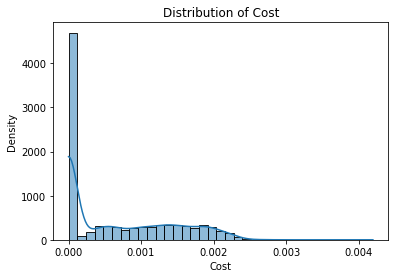

In [18]:
# Plot the distribution of the "cost" column
sns.histplot(data=df, x='cost', kde=True)

# Set the labels and title
plt.xlabel('Cost')
plt.ylabel('Density')
plt.title('Distribution of Cost')

# Display the plot
plt.show()

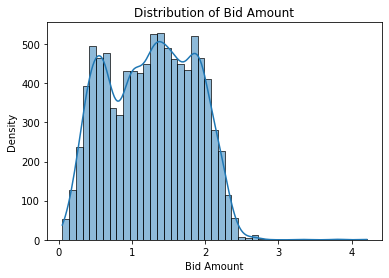

In [19]:
# Plot the distribution of the "BidAmount" column
sns.histplot(data=df, x='BidAmount', kde=True)

# Set the labels and title
plt.xlabel('Bid Amount')
plt.ylabel('Density')
plt.title('Distribution of Bid Amount')

# Display the plot
plt.show()

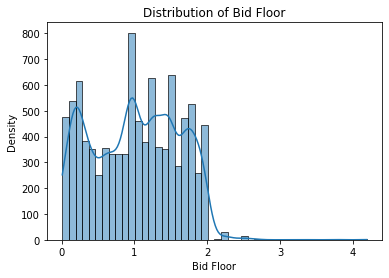

In [20]:
# Plot the distribution of the "BidFloor" column
sns.histplot(data=df, x='BidFloor', kde=True)

# Set the labels and title
plt.xlabel('Bid Floor')
plt.ylabel('Density')
plt.title('Distribution of Bid Floor')

# Display the plot
plt.show()

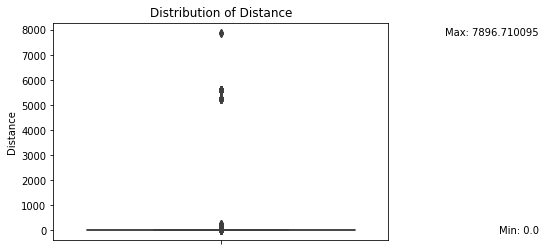

In [27]:
# Create a box plot of the "distance" column
sns.boxplot(data=df, y='distance')

# Set the labels and title
plt.ylabel('Distance')
plt.title('Distribution of Distance')

# Add text annotations for the maximum and minimum values
plt.text(0.95, df['distance'].max(), f"Max: {df['distance'].max()}", ha='right', va='center')
plt.text(0.95, df['distance'].min(), f"Min: {df['distance'].min()}", ha='right', va='center')

# Display the plot
plt.show()

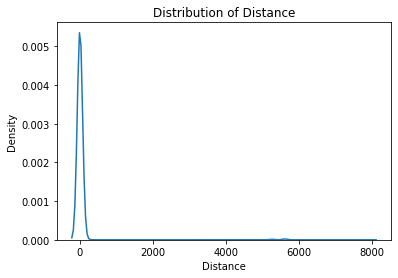

In [28]:
sns.kdeplot(data=df, x='distance')

# Set the labels and title
plt.xlabel('Distance')
plt.ylabel('Density')
plt.title('Distribution of Distance')

# Display the plot
plt.show()

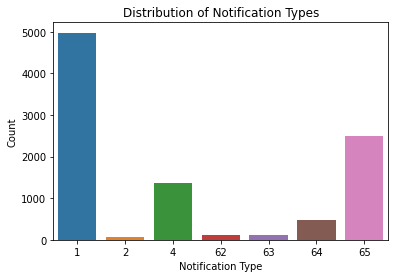

In [31]:
# Plot the distribution of the "NotificationType" column
sns.countplot(data=df, x='NotificationType')

# Set the labels and title
plt.xlabel('Notification Type')
plt.ylabel('Count')
plt.title('Distribution of Notification Types')

# Display the plot
plt.show()

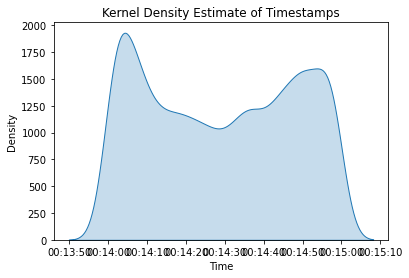

In [35]:
# Plot KDE of time
sns.kdeplot(data=df, x='timestamp', fill=True)

# Set the labels and title
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Timestamps')

# Display the plot
plt.show()

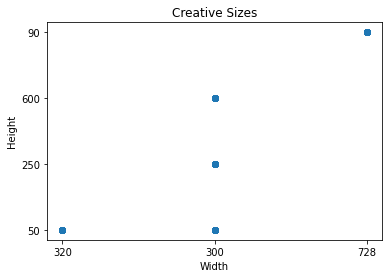

In [38]:
df[['Width', 'Height']] = df['CreativeSize'].str.split('x', expand=True)

plt.scatter(df['CreativeW'], df['CreativeH'])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Creative Sizes')
plt.show()

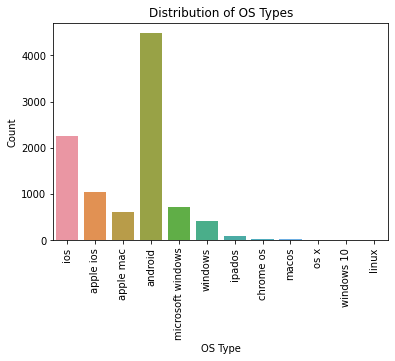

In [39]:
df['OS'] = df['OS'].str.lower()
sns.countplot(data=df, x='OS')

# Set the labels and title
plt.xlabel('OS Type')
plt.ylabel('Count')
plt.title('Distribution of OS Types')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

notification types 62/63/64